In [1]:
import pydicom



ds_filepath = "selected_dicoms_astro/TCGA-CS-6666_8b07ae3b-455b-417a-bf85-a8990120affe.dcm"

ds = pydicom.dcmread(ds_filepath , stop_before_pixels=True)

print(ds.Columns)
print(ds.Rows)
print(ds.TotalPixelMatrixColumns)
print(ds.TotalPixelMatrixRows)
print(ds.NumberOfFrames)
print(ds.file_meta.TransferSyntaxUID)

256
256
147723
69077
156060
1.2.840.10008.1.2.4.91


In [4]:
import openslide

# NDPI dosyasını aç
slide = openslide.OpenSlide('data/7316UP-8.ndpi')

# Metadata bilgilerini al
for key, value in slide.properties.items():
    print(f"{key}: {value}")

# Boyut bilgisi
print("Boyut:", slide.dimensions)  # (width, height)

# Düzey sayısı (zoom seviyeleri)
print("Düzeyler:", slide.level_count)

# Belirli bir seviyede boyut
print("Level 1 boyut:", slide.level_dimensions[1])



hamamatsu.Area.Height.Macro: 26000
hamamatsu.Area.Width.Macro: 76000
hamamatsu.CCD.Height: -1
hamamatsu.CCD.Width: 5303
hamamatsu.Calibration.Version: 500
hamamatsu.Coarse.Focus.Pitch: 5000
hamamatsu.Coarse.Focus.Travel: 10000
hamamatsu.Condenser.NA: ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ
hamamatsu.Condition2.CCD.Height: -1
hamamatsu.Condition2.CCD.Width: -1
hamamatsu.Condition2.Lane.Shift.Amount: -nan
hamamatsu.Condition2.Objective.Lens.Magnificant: -nan
hamamatsu.Condition2.Stage.Offset: -1,-1,-1
hamamatsu.Condition2.Vertical.Offset: -1,-1
hamamatsu.Created: 2021/07/29
hamamatsu.Exposure.Barcode.Macro: 14
hamamatsu.Exposure.CassetteBarcode: 71
hamamatsu.Exposure.Slide.Darkfield.Macro: -1
hamamatsu.Exposure.Slide.Macro: 2
hamamatsu.Fine.Focus.Pitch: 250
hamamatsu.Fine.Focus.Travel: 400
hamamatsu.FocalPlane.LeftBottom: 294249,234257,115923
hamamatsu.FocalPlane.LeftTop: 294249,34257,115956
hamamatsu.FocalPlane.RightBottom: 694249,234257,116576
hamam

In [2]:
import os
import numpy as np

# npy dosyalarının bulunduğu klasör
folder_path = "gbm_2500_mlp"  # burayı kendi dizininle değiştir

# Klasördeki tüm dosyaları dolaş
for file_name in os.listdir(folder_path):
    if file_name.endswith(".npy"):
        file_path = os.path.join(folder_path, file_name)
        try:
            data = np.load(file_path)
            print(f"{file_name}: {data.shape}")
        except Exception as e:
            print(f"Hata oluştu ({file_name}): {e}")


TCGA-41-3392_62503d28-ded5-4f6f-a553-a0c36ee8e8a9.npy: (2500, 240, 240)
TCGA-02-0266_b038f780-b9c2-4871-888f-a9744ee2869f.npy: (2501, 57600)
TCGA-19-2623_90477a90-1633-4981-a420-d474a3832d3b.npy: (2500, 57600)
TCGA-06-0139_d94d1556-0473-4e4c-a653-75f458464861.npy: (2501, 57600)
TCGA-19-5958_b0a306f3-19ae-4cfc-ac8c-ae0c89bb22af.npy: (2500, 57600)
TCGA-02-0107_ddf47db1-025c-4b88-b372-efbc7b44aef1.npy: (2500, 240, 240)
TCGA-02-0115_3eee07bc-1f94-43c7-9d35-44724ad44bd1.npy: (2500, 57600)
TCGA-16-1460_ae923537-2c6c-46d4-91ef-15e75f1a70e6.npy: (2500, 57600)
TCGA-12-0780_1e458b51-8cc9-40b0-b9bf-72c145fe3757.npy: (2500, 240, 240)
TCGA-32-4209_6a60b60f-0265-4221-9366-71c9083b107f.npy: (2500, 57600)
TCGA-02-0021_997c6fd3-224e-483d-a081-adba936ee448.npy: (2501, 57600)
TCGA-06-2561_b20dea42-f255-4e74-9485-a77068a424b6.npy: (2500, 57600)
TCGA-12-0707_95e84fc7-f0d9-4485-b759-17c63c21fc7c.npy: (2500, 57600)
TCGA-06-0882_919673b0-2b5c-49e4-b1e2-03a23b7f4627.npy: (2500, 57600)
TCGA-06-0125_8fdd3e57-ca3

In [10]:
import numpy as np


npy = np.load("TCGA-R8-A6MK_93.npy")

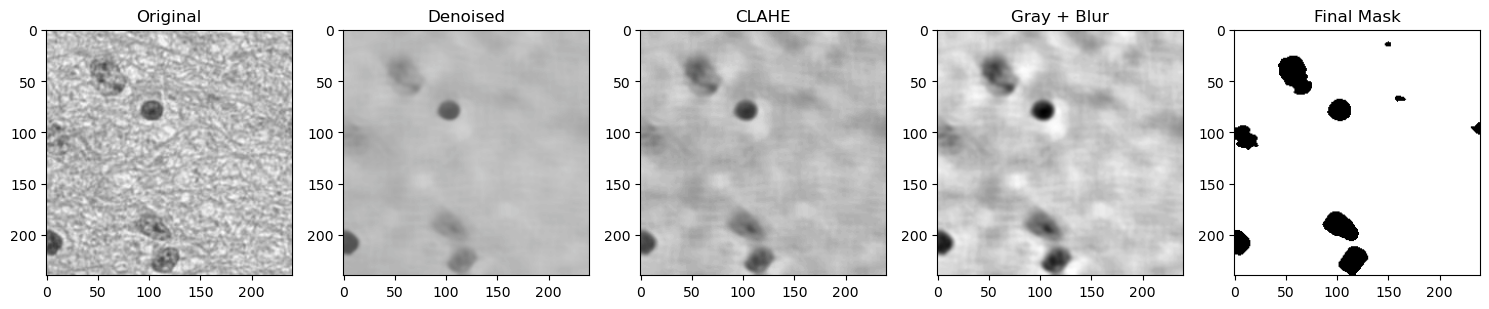

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (color)
img = npy[1200]
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Step 1: Noise reduction (Non-local Means Denoising)
denoised = cv2.fastNlMeansDenoisingColored(img, None, h=30, hColor=10, templateWindowSize=7, searchWindowSize=21)

# Step 2: CLAHE on L-channel (LAB color space)
lab = cv2.cvtColor(denoised, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l_clahe = clahe.apply(l)
lab_clahe = cv2.merge((l_clahe, a, b))
enhanced_rgb = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# Step 3: Convert to grayscale
gray = cv2.cvtColor(enhanced_rgb, cv2.COLOR_RGB2GRAY)

# Step 4: Gaussian blur to smooth small variation
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Step 5: Otsu's thresholding
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 6: Morphological opening (clean small noise)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 5, 2); plt.imshow(denoised); plt.title("Denoised")
plt.subplot(1, 5, 3); plt.imshow(enhanced_rgb); plt.title("CLAHE")
plt.subplot(1, 5, 4); plt.imshow(blurred, cmap='gray'); plt.title("Gray + Blur")
plt.subplot(1, 5, 5); plt.imshow(cleaned, cmap='gray'); plt.title("Final Mask")
plt.tight_layout()
plt.show()


In [12]:
import cupy as cp
from cuml.decomposition import PCA as cuPCA
from skimage.util import view_as_windows
import numpy as np
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from cuml.decomposition import pca

arr = npy

# Convert to PyTorch tensor [B, 1, H, W]
imgs = torch.from_numpy(arr).float().unsqueeze(1) / 255.0
imgs = imgs.cuda()




# --- Step 2: Improved Gaussian Blur (denoising) ---
def get_gaussian_blur(kernel_size=7, sigma=1.5):
    ax = torch.arange(-(kernel_size // 2), kernel_size // 2 + 1).float()
    gauss = torch.exp(-0.5 * (ax / sigma) ** 2)
    gauss = gauss / gauss.sum()
    kernel_2d = gauss[:, None] @ gauss[None, :]
    conv = torch.nn.Conv2d(1, 1, kernel_size=kernel_size, padding=kernel_size // 2, bias=False)
    conv.weight.data = kernel_2d.view(1, 1, kernel_size, kernel_size)
    conv.weight.requires_grad = False
    return conv.cuda()

def pca_denoise_gpu(images, patch_size=8, n_components=10):
    """
    Perform PCA denoising on a batch of images using cuML PCA on GPU.
    Handles 4D tensor input with shape [B, 1, H, W] and performs GPU-based patch extraction.

    Args:
        images (torch.Tensor): Batch of grayscale images (B, 1, H, W).
        patch_size (int): Size of patches to extract.
        n_components (int): Number of principal components to retain.

    Returns:
        torch.Tensor: Denoised batch of images.
    """
    B, C, H, W = images.shape
    # Convert to NumPy (on GPU) using cupy
    images_gpu = cp.asarray(images.squeeze(1).cpu().numpy())

    # Step 1: Extract patches using Cupy (GPU-based)
    ph = H // patch_size
    pw = W // patch_size
    patches = cp.lib.stride_tricks.as_strided(images_gpu, shape=(B, ph, pw, patch_size, patch_size), strides=(images_gpu.strides[0], images_gpu.strides[1] * patch_size, images_gpu.strides[2] * patch_size, images_gpu.strides[1], images_gpu.strides[2]))

    # Reshape patches for PCA
    patches_reshaped = patches.reshape(B, -1, patch_size * patch_size)

    # Step 2: Apply PCA (on GPU) to denoise the patches for the entire batch
    pca = cuPCA(n_components=n_components)
    patches_denoised = pca.inverse_transform(pca.fit_transform(patches_reshaped.reshape(-1, patch_size * patch_size)))

    # Step 3: Reconstruct the images from denoised patches
    patches_denoised = patches_denoised.reshape(B, ph, pw, patch_size, patch_size)

    # Combine patches back into the batch of images
    denoised_images = np.block([[patches_denoised[b, i, j] for j in range(pw)] for i in range(ph) for b in range(B)])

    # Return denoised images as a batch (convert back to torch tensor)
    return torch.tensor(denoised_images.reshape(B, H, W)).cuda()


def get_sharpen_filter():
    kernel = torch.tensor([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], dtype=torch.float32).view(1, 1, 3, 3)
    sharpen = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
    sharpen.weight.data = kernel
    sharpen.weight.requires_grad = False
    return sharpen.cuda()





# gaussian_blur = get_gaussian_blur(kernel_size=7, sigma=1.5)
# blurred = gaussian_blur(imgs)

imgs = pca_denoise(imgs)
# sharpen = get_sharpen_filter()
# sharpened = sharpen(enhanced)

# --- Output to NumPy ---
result = (imgs.squeeze(1).clamp(0, 1).cpu().numpy() * 255).astype(np.uint8)

# --- Visualization ---
plt.figure(figsize=(12, 4))
for i in range(4):  # Show first 4 samples
    plt.subplot(2, 4, i+1); plt.imshow(arr[i], cmap='gray'); plt.title("Original")
    plt.subplot(2, 4, i+5); plt.imshow(result[i], cmap='gray'); plt.title("Processed")
plt.tight_layout(); plt.show()

TypeError: `arr_in` must be a numpy ndarray

In [4]:
import pandas as pd

df = pd.read_csv("dataset2/selected.csv")

df_filter = df[df["CT_dir"].str.contains("TCGA", na=False)]
print(df_filter)


     Unnamed: 0.1  Unnamed: 0            id  sex     death    age  count  \
36             58         380  TCGA-14-0865    0   366-600  65-72    1.0   
37             69         351  TCGA-12-0620    0   150-365  50-58  420.0   
38             76         220  TCGA-02-0003    0     0-150  50-58   25.0   
39             77         254  TCGA-06-0137    1  601-1825  58-65    9.0   
40             78         352  TCGA-12-0769    0   366-600  50-58   44.0   
..            ...         ...           ...  ...       ...    ...    ...   
715          1176         596  TCGA-HT-7485    0     1825+   0-50    NaN   
716          1178         606  TCGA-HT-7610    1     1825+   0-50    NaN   
717          1179         586  TCGA-HT-7474    0     1825+  50-58    NaN   
718          1180         597  TCGA-HT-7601    1     1825+   0-50    NaN   
719          1182         638  TCGA-HT-7882    0     1825+  65-72    NaN   

     dataset                                             CT_dir  
36     False  ../data